In [2]:
#%reset
import sys
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

# Two-hour test visualization

In [2]:
basedir = '/scratch/b/b380873/reff_fix/'
norad2mom_fi = xr.open_dataset(basedir + 'REFF_FIX_icon_tropic_0001_PL2.nc')
rad2mom_fi = xr.open_dataset(basedir + 'REFF_FIX_icon_tropic_0002_PL2.nc')

In [3]:
# Extract the time corresponding to the new effective radii from the old ones.
old_re_drop = norad2mom_fi.re_drop
old_re_ice = norad2mom_fi.re_ice
new_re_drop = rad2mom_fi.re_drop
new_re_ice = rad2mom_fi.re_ice

In [6]:
# Filter the ice effective radius at ~100, 200, 300, 400 hPa and 
# the droplet effective radius at ~500, 600, 700, and 800 hPa.
old_re = [[] for i in np.arange(8)]
new_re = [[] for i in np.arange(8)]
ll = [[18,21],[39,41],[52,53],[64,66],[74,76],[80,82],[91,93],[99,101]]

for i, l in enumerate(ll):
    if i < 4:
        temp = old_re_ice.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        old_re[i].append(temp.where(temp > 0).dropna(dim='ncells'))
        temp = new_re_ice.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        new_re[i].append(temp.where(temp > 0).dropna(dim='ncells'))
    else:
        temp = old_re_drop.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        old_re[i].append(temp.where(temp > 0).dropna(dim='ncells'))
        temp = new_re_drop.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        new_re[i].append(temp.where(temp > 0).dropna(dim='ncells'))
        

/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Generate probability distributions of ice and droplet effective radii at different pressure levels.

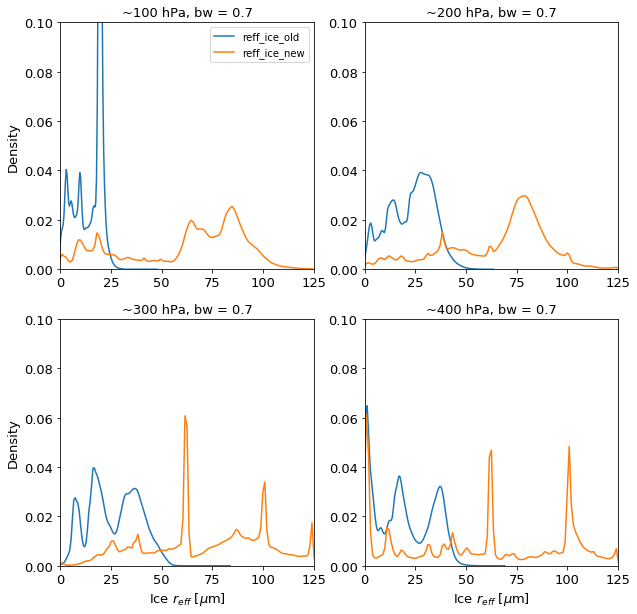

In [8]:
fs = 13
bw_param = 0.7
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
titre = ['~100 hPa, bw = ' + str(bw_param),'~200 hPa, bw = ' + str(bw_param),\
         '~300 hPa, bw = ' + str(bw_param),'~400 hPa, bw = ' + str(bw_param)]
lbl = ['reff_ice_old','_nolabel_','_nolabel_','_nolabel_',
       'reff_ice_new','_nolabel_','_nolabel_','_nolabel_']

for i, axes in enumerate(ax.reshape(-1)):
    sns.kdeplot(old_re[i][0],bw=bw_param,label=lbl[i],ax=axes)
    sns.kdeplot(new_re[i][0],bw=bw_param,label=lbl[i+4],ax=axes)
    axes.set_title(titre[i],fontsize=fs)
    axes.set_ylim([0,0.1])
    axes.set_xlim([0,125])
    axes.tick_params('both',labelsize=fs)
    if i == 0 or i == 2:
        axes.set_ylabel('Density',fontsize=fs)
    if i == 2 or i == 3:
        axes.set_xlabel(r'Ice $r_{eff}$ [$\mu$m]',fontsize=fs)
        
#fig.savefig('ice-reff-kde.pdf',bbox_inches='tight')
plt.show()

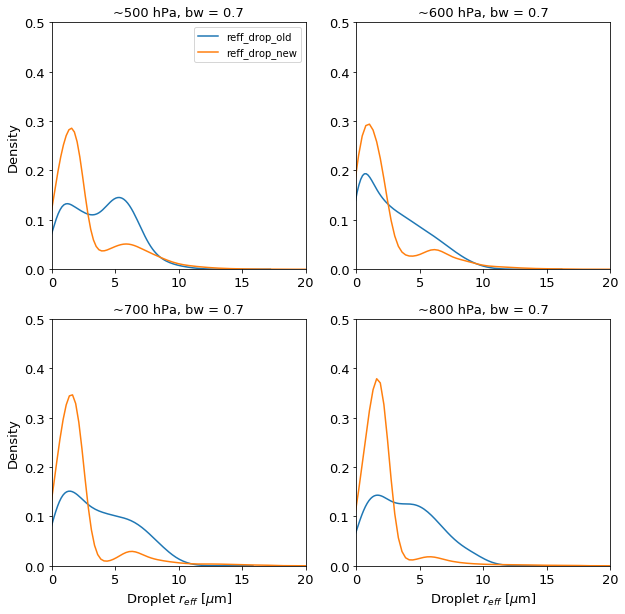

In [9]:
bw_param = 0.7
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
titre = ['~500 hPa, bw = ' + str(bw_param),'~600 hPa, bw = ' + str(bw_param),\
         '~700 hPa, bw = ' + str(bw_param),'~800 hPa, bw = ' + str(bw_param)]
lbl = ['reff_drop_old','_nolabel_','_nolabel_','_nolabel_',
       'reff_drop_new','_nolabel_','_nolabel_','_nolabel_']

for i, axes in enumerate(ax.reshape(-1)):
    sns.kdeplot(old_re[i+4][0],bw=bw_param,label=lbl[i],ax=axes)
    sns.kdeplot(new_re[i+4][0],bw=bw_param,label=lbl[i+4],ax=axes)
    axes.set_title(titre[i],fontsize=fs)
    axes.set_ylim([0,0.5])
    axes.set_xlim([0,20])
    axes.tick_params('both',labelsize=fs)
    if i == 0 or i == 2:
        axes.set_ylabel('Density',fontsize=fs)
    if i == 2 or i == 3:
        axes.set_xlabel(r'Droplet $r_{eff}$ [$\mu$m]',fontsize=fs)

#fig.savefig('droplet-reff-kde.pdf',bbox_inches='tight')
plt.show()

### Generate mean vertical profiles of ice and droplet effective radii

In [11]:
# Calculate the mean over both space and time. 
# It seems to be faster if this is done in two separate commands.
s1 = old_re_ice.mean(dim='ncells')
s2 = old_re_drop.mean(dim='ncells')
s3 = new_re_ice.mean(dim='ncells')
s4 = new_re_drop.mean(dim='ncells')

field = [s1.mean(dim='time'),s2.mean(dim='time'),s3.mean(dim='time'),s4.mean(dim='time')]

del s1
del s2
del s3
del s4

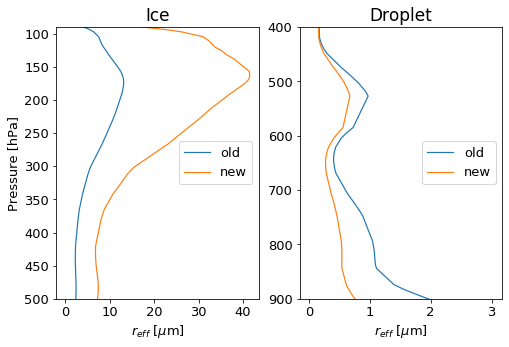

In [13]:
bw_param = 0.7
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
titre = ['Ice','Droplet']
lbl = ['old','old','new','new']
plev = norad2mom_fi.plev

for i, axes in enumerate(ax.reshape(-1)):
    axes.plot(field[i],plev/100.,linewidth=1.2,label=lbl[i])
    axes.plot(field[i+2],plev/100.,linewidth=1.2,label=lbl[i+2])
    axes.set_title(titre[i],fontsize=fs+4)
    if i == 0:
        axes.set_ylim([90,500])
    else:
        axes.set_ylim([400,900])
    axes.legend(fontsize=fs,loc='center right')
    axes.tick_params('both',labelsize=fs)
    if i == 0:
        axes.set_ylabel('Pressure [hPa]',fontsize=fs)
    axes.set_xlabel(r'$r_{eff}$ [$\mu$m]',fontsize=fs)
    axes.invert_yaxis()

#fig.savefig('../output/ice-droplet-reff-profiles.pdf',bbox_inches='tight')
plt.show()

### Generate probability distributions of ice crystal and droplet number concentrations at different pressure levels

In [ ]:
# Load the CDNC and ICNC from the two simulations
old_cdnc = norad2mom_fi.acdnc
old_inc = norad2mom_fi.ainc
new_cdnc = rad2mom_fi.acdnc
new_inc = rad2mom_fi.ainc

In [ ]:
# Filter the ice crystal number concentration at ~100, 200, 300, 400 hPa and 
# the cloud droplet number concentration at ~500, 600, 700, and 800 hPa.
old_num = [[] for i in np.arange(8)]
new_num = [[] for i in np.arange(8)]
ll = [[18,21],[39,41],[52,53],[64,66],[74,76],[80,82],[91,93],[99,101]]

for i, l in enumerate(ll):
    if i < 4:
        temp = old_inc.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        old_num[i].append(temp.where(temp > 0).dropna(dim='ncells'))
        temp = new_inc.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        new_num[i].append(temp.where(temp > 0).dropna(dim='ncells'))
    else:
        temp = old_cdnc.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        old_num[i].append(temp.where(temp > 5e7).dropna(dim='ncells'))
        temp = new_cdnc.isel(plev=slice(l[0],l[1])).mean(dim={'plev','time'})
        new_num[i].append(temp.where(temp > 0).dropna(dim='ncells'))

In [ ]:
fs = 13
bw_param = 0.6
fig3, ax3 = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
titre = ['~100 hPa, bw = ' + str(bw_param),'~200 hPa, bw = ' + str(bw_param),\
         '~300 hPa, bw = ' + str(bw_param),'~400 hPa, bw = ' + str(bw_param)]
lbl = ['ICNC_ice_old','_nolabel_','_nolabel_','_nolabel_',
       'ICNC_ice_new','_nolabel_','_nolabel_','_nolabel_']

for i, axes in enumerate(ax3.reshape(-1)):
    sns.kdeplot(old_num[i][0],bw=bw_param,label=lbl[i],ax=axes)
    sns.kdeplot(new_num[i][0],bw=bw_param,label=lbl[i+4],ax=axes)
    axes.set_title(titre[i],fontsize=fs)
    #axes.set_ylim([0,0.25])
    #axes.set_xlim([0,125])
    axes.tick_params('both',labelsize=fs)
    if i == 0 or i == 2:
        axes.set_ylabel('Density',fontsize=fs)
    if i == 2 or i == 3:
        axes.set_xlabel(r'Ice crystal number concentration [m$^{-3}$]',fontsize=fs)
        
#fig.savefig('inc-kde.pdf',bbox_inches='tight')
plt.show()

In [ ]:
fs = 13
bw_param = 1
fig3, ax3 = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
titre = ['~500 hPa, bw = ' + str(bw_param),'~600 hPa, bw = ' + str(bw_param),\
         '~700 hPa, bw = ' + str(bw_param),'~800 hPa, bw = ' + str(bw_param)]
lbl = ['CDNC_ice_old','_nolabel_','_nolabel_','_nolabel_',
       'CDNC_ice_new','_nolabel_','_nolabel_','_nolabel_']

for i, axes in enumerate(ax3.reshape(-1)):
    sns.kdeplot(old_num[i+4][0]/10**6,bw=bw_param,label=lbl[i],ax=axes)
    sns.kdeplot(new_num[i+4][0]/10**6,bw=bw_param,label=lbl[i+4],ax=axes)
    axes.set_title(titre[i],fontsize=fs)
    #axes.set_ylim([0,0.25])
    #axes.set_xlim([0,125])
    axes.tick_params('both',labelsize=fs)
    if i == 0 or i == 2:
        axes.set_ylabel('Density',fontsize=fs)
    if i == 2 or i == 3:
        axes.set_xlabel(r'Ice crystal number concentration [cm$^{-3}$]',fontsize=fs)
    
#fig.savefig('cdnc-kde.pdf',bbox_inches='tight')
plt.show()

### Generate mean vertical profiles of ice crystal and droplet number concentrations

In [ ]:
# Calculate the mean over both space and time. 
# It seems to be faster if this is done in two separate commands.
s1 = old_cdnc.mean(dim='ncells')
s2 = old_inc.mean(dim='ncells')
s3 = new_cdnc.mean(dim='ncells')
s4 = new_inc.mean(dim='ncells')

field = [s1.mean(dim='time'),s2.mean(dim='time'),s3.mean(dim='time'),s4.mean(dim='time')]

del s1
del s2
del s3
del s4

In [ ]:
bw_param = 0.7
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
titre = ['Ice','Droplet']
lbl = ['old','old','new','new']
plev = rad1mom_fi.plev

for i, axes in enumerate(ax.reshape(-1)):
    axes.plot(field[i]/10**9,plev/100.,linewidth=1.2,label=lbl[i])
    axes.plot(field[i+2],plev/100.,linewidth=1.2,label=lbl[i+2])
    axes.set_title(titre[i],fontsize=fs+4)
    if i == 0:
        axes.set_ylim([90,500])
    else:
        axes.set_ylim([400,900])
    axes.legend(fontsize=fs,loc='center right')
    axes.tick_params('both',labelsize=fs)
    if i == 0:
        axes.set_ylabel('Pressure [hPa]',fontsize=fs)
    axes.set_xlabel(r'$N$ [m$^{-3}$]',fontsize=fs)
    axes.invert_yaxis()

#fig.savefig('ice-droplet-reff-profiles.pdf',bbox_inches='tight')
plt.show()

# 24-hour visualization

In [3]:
# These two functions calculate the mean vertical profile over many files.
def file_prefix(j):
    if len(str(j)) == 1:
       return '000'
    elif len(str(j)) == 2:
       return '00'
    elif len(str(j)) == 3:
       return '0'
    else:
       return 'Inappropriate length of input to file_prefix'

# basedir is the base directory where the nc files are found.
# tag is how to label the output npy.
# startindx and endinx are the files over which to iterate.
# var is which variable to pull from the input file.
# in-cloud is a boolean whether to weight by cloud fraction or not.
def meanProfile(basedir, tag, startindx, endindx, var, f):
    # How many vertical levels?
    c = 120
    suffix1 = '_PL2'
    RE = np.zeros((24,c))

    for i in np.arange(startindx,endindx):
        print(i)
        prefix = file_prefix(i)
        reff = xr.open_dataset(basedir + 'CLCONV_3D_icon_tropic_' + prefix + str(i) + suffix1 + '.nc')
        if f == True:
            # Divide by the cloud fraction to get the in-cloud value. Cloud fraction is [%] so multiply by 100.
            reff_clch = reff[var].isel(time=0)/reff['clc'].isel(time=0)
            # Two lines below to mask infinity - where cld fraction = 0 - and to omit NaNs in the mean thereafter. 
            reff_clch = reff_clch.where(np.isinf(reff_clch) == False)
            RE[i-startindx] = reff_clch.mean(dim={'ncells'},skipna=True)
            suffix = '-in-cloud'
        else:
            RE[i-startindx] = reff[var].isel(time=0).mean(dim={'ncells'})
            suffix = ''
        
    print('Saving hourly mean profiles from ' + basedir + '...')
    np.save('../output/' + var.upper() + '_' + tag + '_PL2' + suffix + '.npy',RE)
    return RE

### Generate mean vertical profiles of ice and droplet effective radii, both total and in-cloud

In [11]:
# Use the functions above to calculate mean effective radius and number concentrations
# from the two simulations or load the already calculated values.

#re_ice_rad2mom = meanProfile('/scratch/b/b380873/reff_fix/24h_TRUE/', 'rad2mom', 6, 30, 're_ice', True)
#re_drop_rad2mom = meanProfile('/scratch/b/b380873/reff_fix/24h_TRUE/', 'rad2mom', 6, 30, 're_drop', True)
#re_ice_2mom = meanProfile('/scratch/b/b380873/reff_fix/24h_FALSE/', '2mom', 6, 30, 're_ice', True)
#re_drop_2mom = meanProfile('/scratch/b/b380873/reff_fix/24h_FALSE/', '2mom', 6, 30, 're_drop', True)

#icnc_2mom = meanProfile(basedir, '2mom', 6, 30, 'ainc', False)
#cdnc_2mom = meanProfile(basedir, '2mom', 6, 30, 'acdnc', False)

suffix = '' # '-in-cloud'
re_ice_2mom = np.load('../output/RE_ICE_2mom_PL2' + suffix + '.npy') 
re_drop_2mom = np.load('../output/RE_DROP_2mom_PL2' + suffix + '.npy')
re_ice_rad2mom = np.load('../output/RE_ICE_rad2mom_PL2' + suffix + '.npy')
re_drop_rad2mom = np.load('../output/RE_DROP_rad2mom_PL2' + suffix + '.npy')

inc_2mom = np.load('../output/AINC_2mom_PL2' + suffix + '.npy')
cdnc_2mom = np.load('../output/ACDNC_2mom_PL2' + suffix + '.npy')
inc_rad2mom = np.load('../output/AINC_rad2mom_PL2' + suffix + '.npy')
cdnc_rad2mom = np.load('../output/ACDNC_rad2mom_PL2' + suffix + '.npy')

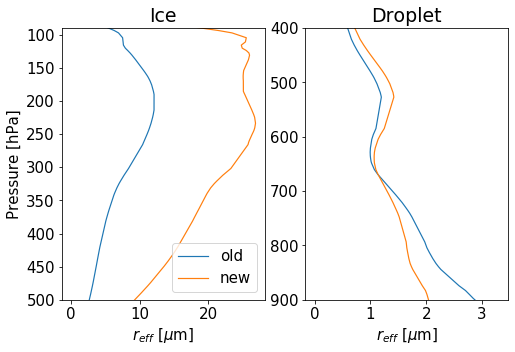

In [9]:
# Plot the mean effective radii profiles
basedir = '/scratch/b/b380873/reff_fix/24h_TRUE/'
field = [np.nanmean(re_ice_2mom,axis=0), np.nanmean(re_drop_2mom,axis=0),
         np.nanmean(re_ice_rad2mom,axis=0), np.nanmean(re_drop_rad2mom,axis=0)]
titre = ['Ice','Droplet']
lbl = ['old','old','new','new']
fs = 15
plev = xr.open_dataset(basedir + 'CLCONV_3D_icon_tropic_0006_PL2.nc').plev

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
for i, axes in enumerate(ax.reshape(-1)):
    axes.plot(field[i],plev/100.,linewidth=1.2,label=lbl[i])
    axes.plot(field[i+2],plev/100.,linewidth=1.2,label=lbl[i+2])  #[0]
    axes.set_title(titre[i],fontsize=fs+4)
    if i == 0:
        axes.set_ylim([90,500])
    else:
        axes.set_ylim([400,900])
    axes.tick_params('both',labelsize=fs)
    if i == 0:
        axes.set_ylabel('Pressure [hPa]',fontsize=fs)
        axes.legend(fontsize=fs,loc='lower right')
    axes.set_xlabel(r'$r_{eff}$ [$\mu$m]',fontsize=fs)
    axes.invert_yaxis()
    
fig.savefig('../output/ice-droplet-reff-profiles2' + suffix + '.pdf',bbox_inches='tight')

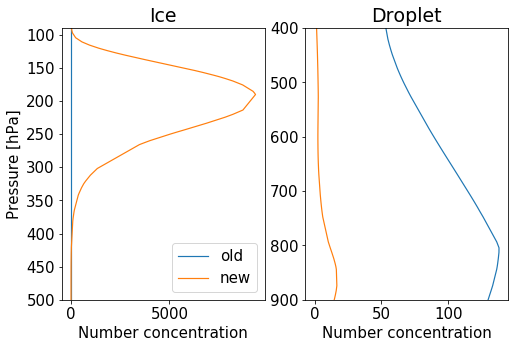

In [17]:
# Plot the mean ICNC and CDNC profiles. Units are [m-3] initially.
field = [np.nanmean(inc_2mom,axis=0)/10**3, np.nanmean(cdnc_2mom,axis=0)/10**6,
        np.nanmean(inc_rad2mom,axis=0)/10**3, np.nanmean(cdnc_rad2mom,axis=0)/10**6]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
for i, axes in enumerate(ax.reshape(-1)):
    axes.plot(field[i],plev/100.,linewidth=1.2,label=lbl[i])
    axes.plot(field[i+2],plev/100.,linewidth=1.2,label=lbl[i+2])  #[0]
    axes.set_title(titre[i],fontsize=fs+4)
    if i == 0:
        axes.set_ylim([90,500])
    else:
        axes.set_ylim([400,900])
    axes.tick_params('both',labelsize=fs)
    if i == 0:
        axes.set_ylabel('Pressure [hPa]',fontsize=fs)
        axes.legend(fontsize=fs,loc='lower right')
    axes.set_xlabel(r'Number concentration',fontsize=fs)
    axes.invert_yaxis()
    
#fig.savefig('../output/icnc-cdnc-profiles2' + suffix + '.pdf',bbox_inches='tight')